<a href="https://colab.research.google.com/github/Artmalik92/Congruence-Test-For-Students/blob/main/geometry_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Геометрический тест в Python

В системах геодезического мониторинга одним из методов обнаружения деформаций является построение ГНСС сетей и анализ движений в них при помощи вычисления невязок в замкнутых фигурах. Данный принцип может быть реализован в виде программы геометрического теста на Python.

Геометрический тест стабильности позволяет выявлять аномальные движения в замкнутой геодезической сети путем вычисления разностей параметров этой сети (внутренних углов, длин базовых линий или координат) на начальную и N-ую эпоху. Если сумма разностей между параметрами статистически не значима, то эти две фигуры конгруэнтны, т. е. аномальных движений нет.

Например, существует треугольник ABC. Нулевая гипотеза геометрического теста заключается в том, что сумма разностей координат точек A, B, C между двумя эпохами должна быть равна нулю. В этом случае треугольник считается стабильным.

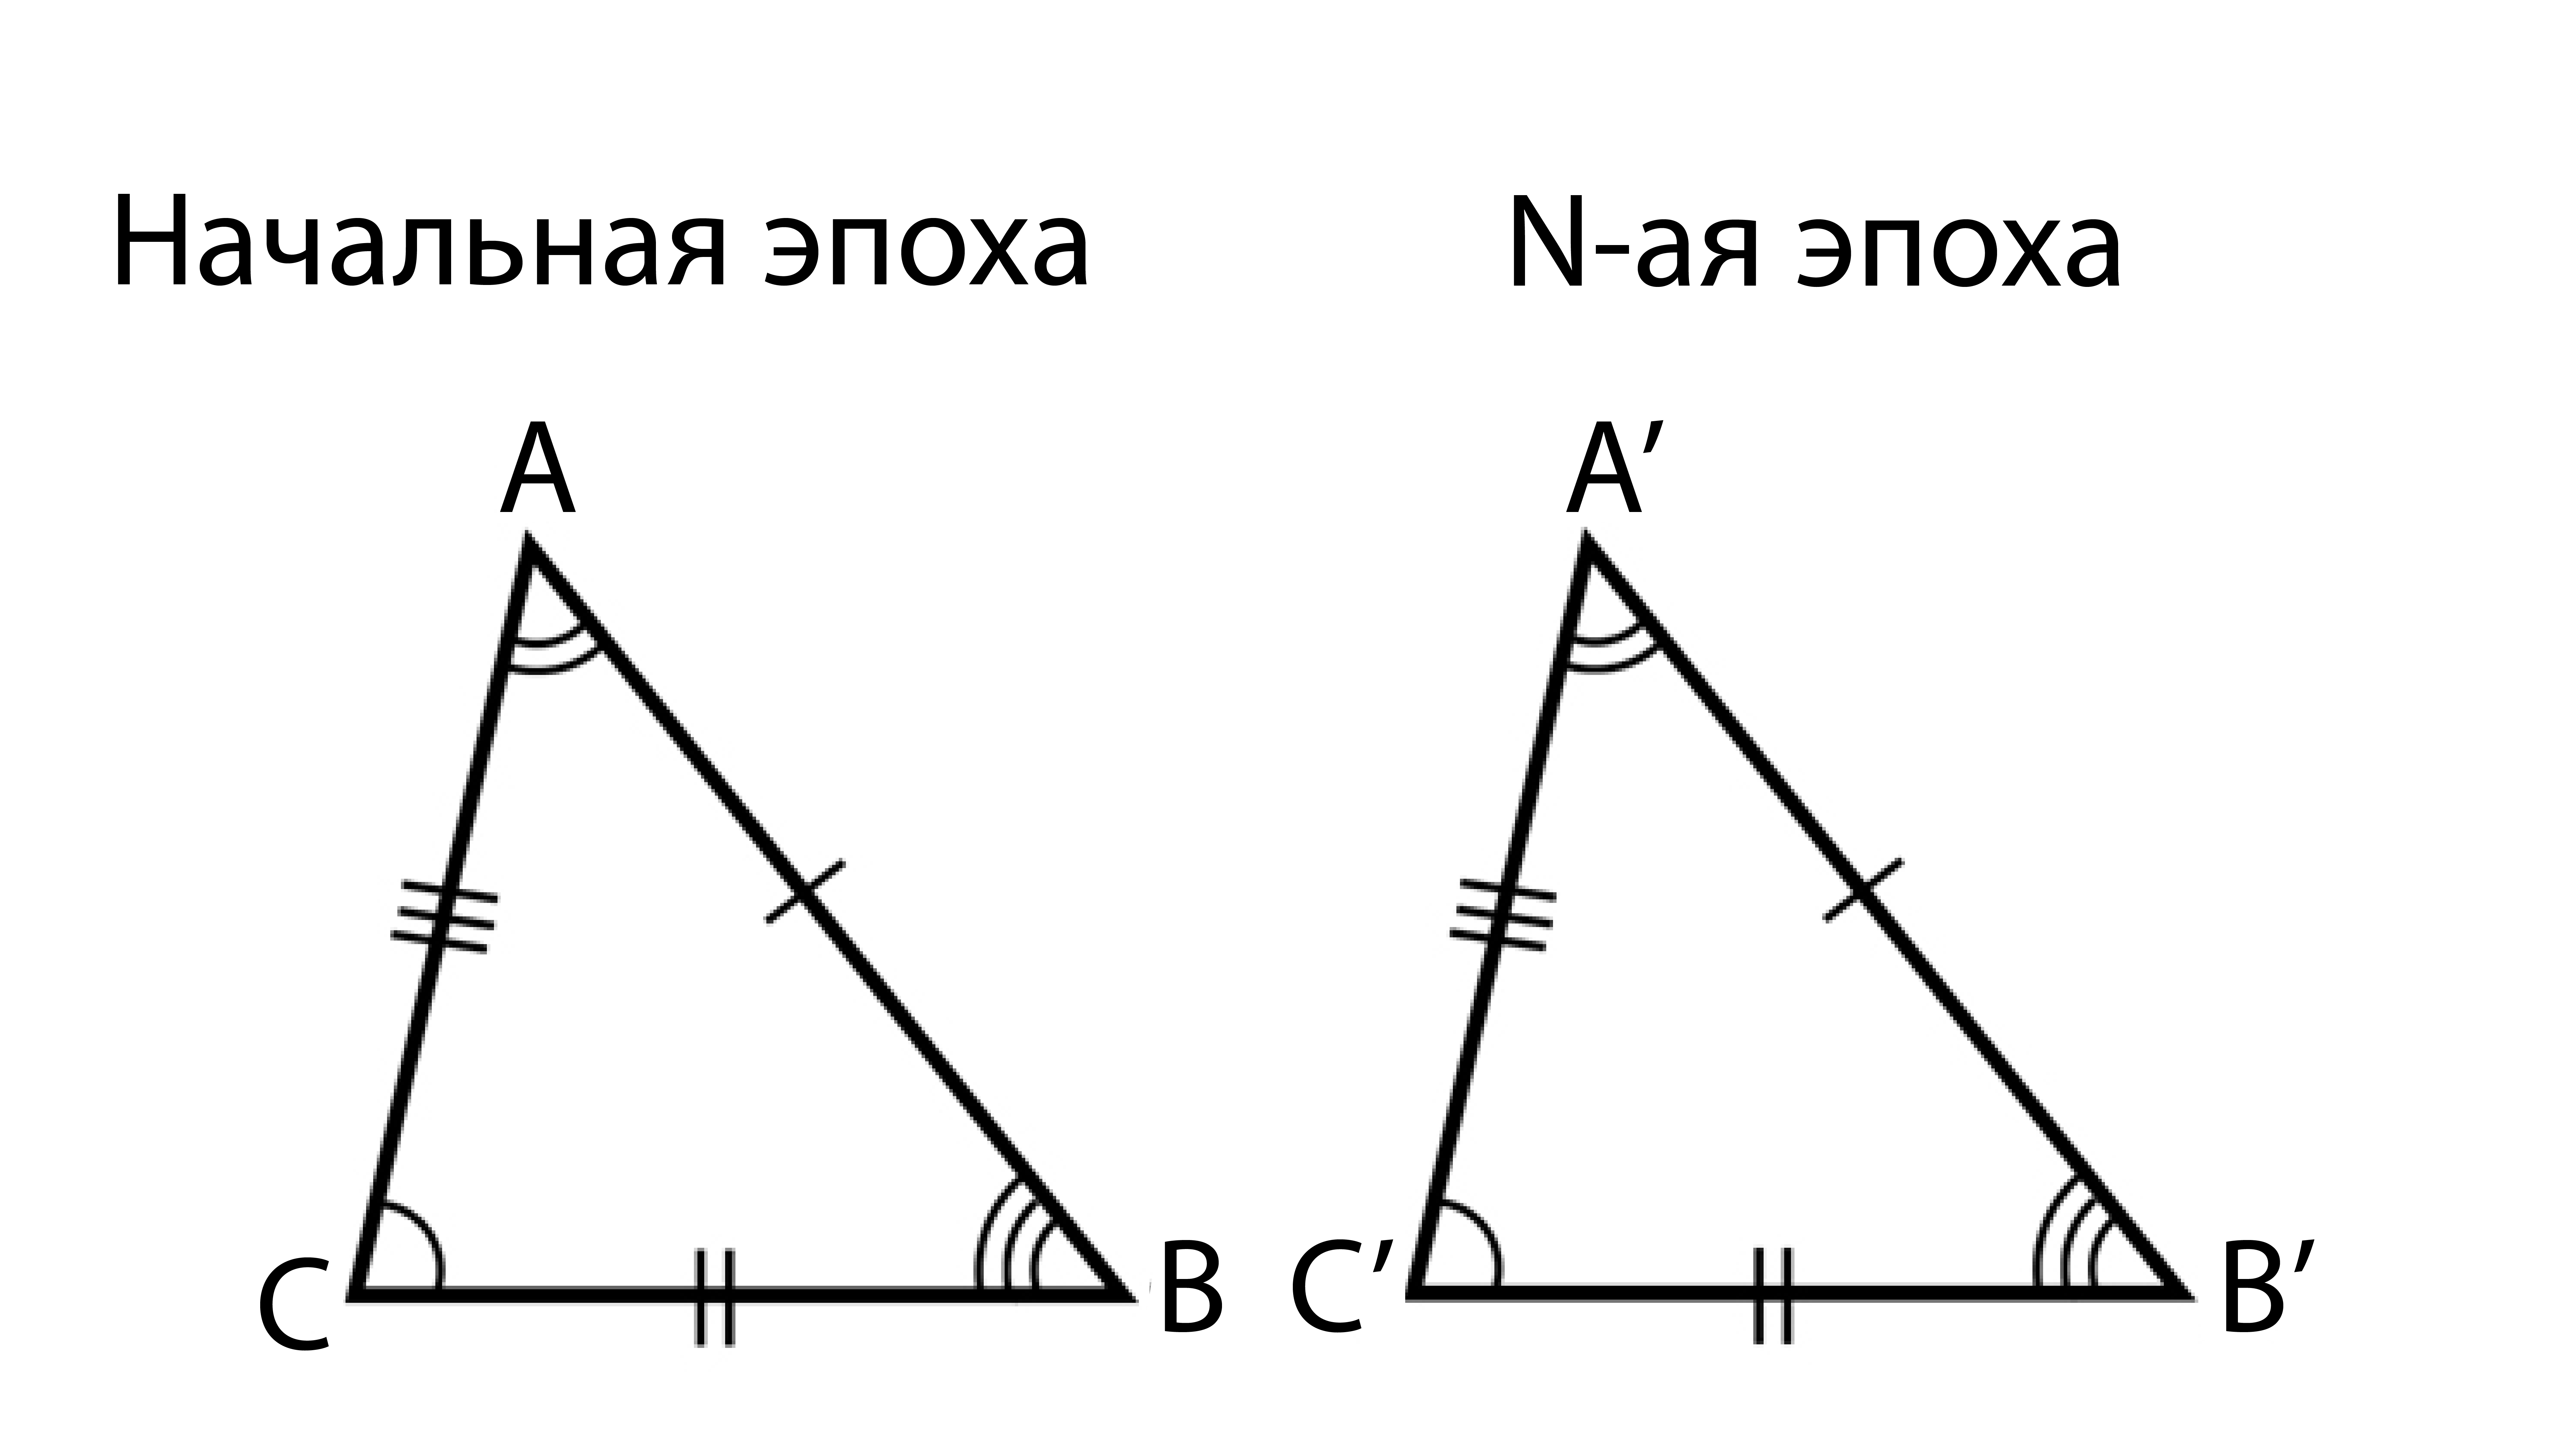

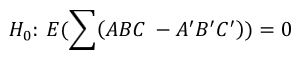

Проверка данной гипотезы выполняется при помощи теста Хи-квадрат, который позволяет оценить статистическую значимость различий между эпохами. Для данной сети может быть вычислено ожидаемое значение статистики. Изменение координат между эпохами считается значимым, если наблюдаемое значение статистики превышает ожидаемое.

Библиотеки, при помощи которых выполнена реализация алгоритма:





In [1]:
import pandas
import numpy
from scipy.stats import chi2
from scipy.linalg import block_diag

Библиотека **pandas** необходима для обработки и структурирования данных в виде таблиц.
**Numpy** используется для выполнения математических операций с матрицами и другими массивами. **Scipy** содержит модуль **stats**, который позволяет выполнять в Python статистические операции, в частности тест Хи-квадрат. Модуль linalg позволяет составлять блочные диагональные матрицы, необходимые в вычислениях.

Для начала следует подготовить тестовый временной ряд координат для тестирования алгоритма. Функция выглядит следующим образом:

In [16]:
def generate_coordinates(noise, observations, start_coordinate, offset=None):

    # генерация координат без смещений
    segment = numpy.full(observations*7, start_coordinate)

    # объединение в один массив
    Coordinates = numpy.hstack([segment]).astype(float)

    if offset:
        # несколько сегментов временного ряда координаты U со смещением
        segment_1 = numpy.full(observations, start_coordinate + offset)
        segment_2 = numpy.full(observations, start_coordinate + offset*2)
        segment_3 = numpy.full(observations, start_coordinate + offset*3)
        segment_4 = numpy.full(observations, start_coordinate + offset*4)
        segment_5 = numpy.full(observations, start_coordinate + offset*5)
        segment_6 = numpy.full(observations, start_coordinate + offset*6)
        segment_7 = numpy.full(observations, start_coordinate + offset*7)

        # объединение сегментов в один массив
        Coordinate_U = numpy.hstack([segment_1, segment_2, segment_3,
                                segment_4, segment_5, segment_6,
                                segment_7]).astype(float)

    else:
        # генерация координат U без смещений
        Coordinate_U = numpy.hstack([segment]).astype(float)

    # моделирование шума в измерениях в виде случайного числа с разбросом 0.005
    Coordinates += numpy.random.normal(0, noise, observations*7)
    Coordinate_U += numpy.random.normal(0, noise, observations*7)

    # Добавление столбцов с СКП
    sigmas = numpy.hstack([numpy.ones(observations*7)*noise])

    # преобразование в таблицу DataFrame для дальнейшего использования
    df = pandas.DataFrame({0: Coordinates,
                        1: Coordinates + 0.1,
                        2: Coordinate_U + 0.2,
                        3: sigmas, 4: sigmas, 5: sigmas})
    return df

При помощи данной функции необходимо сгенерировать 4 временных ряда, чтобы смоделировать геодезическую сеть из 4-х станций.
Первые 3 столбца таблицы содержат координаты E, N, U, следующие 3 столбца - их СКП.

In [17]:
''' Исходные данные '''
noise = 0.005           # Амплитуда шума в измерениях
offset = 0.05           # Амплитуда смещения координаты
observations = 50       # количество измерений

# Генерация 4 временных рядов, по одному для каждой станции
Station_1 = generate_coordinates(noise=noise, observations=observations,
                           start_coordinate=100, offset=offset)
Station_2 = generate_coordinates(noise=noise, observations=observations,
                           start_coordinate=50)
Station_3 = generate_coordinates(noise=noise, observations=observations,
                           start_coordinate=70)
Station_4 = generate_coordinates(noise=noise, observations=observations,
                           start_coordinate=95)

Так будет выглядеть станция, испытывающая вертикальные деформации:

              0           1           2      3      4      5
0    100.001889  100.101889  100.248416  0.005  0.005  0.005
1    100.000182  100.100182  100.250722  0.005  0.005  0.005
2    100.000680  100.100680  100.245442  0.005  0.005  0.005
3    100.011549  100.111549  100.257810  0.005  0.005  0.005
4     99.999927  100.099927  100.239073  0.005  0.005  0.005
..          ...         ...         ...    ...    ...    ...
345   99.998957  100.098957  100.546573  0.005  0.005  0.005
346   99.999313  100.099313  100.548782  0.005  0.005  0.005
347  100.003287  100.103287  100.545806  0.005  0.005  0.005
348  100.001907  100.101907  100.560110  0.005  0.005  0.005
349  100.001827  100.101827  100.550262  0.005  0.005  0.005

[350 rows x 6 columns]


<Axes: >

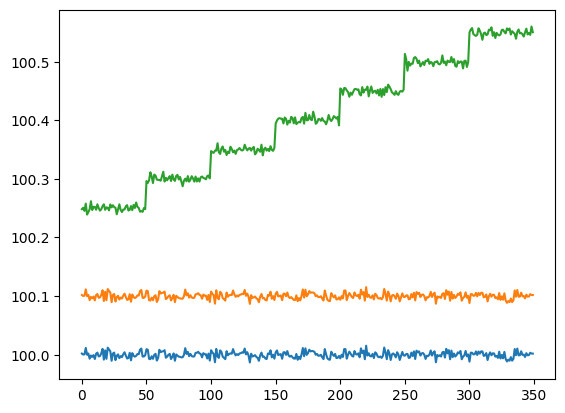

In [18]:
print(Station_1)
Station_1[0].plot()
Station_1[1].plot()
Station_1[2].plot()

Остальные станции смоделированы как неподвижные:

<Axes: >

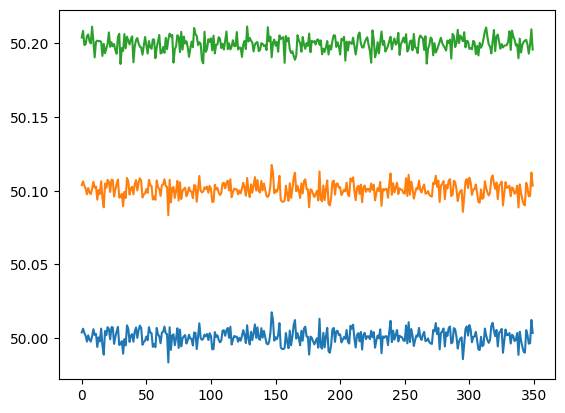

In [19]:
Station_2[0].plot()
Station_2[1].plot()
Station_2[2].plot()

Главной задачей геометрического теста является определение эпох, а также станций в которых происходит деформация.

При выполнении расчетов в качестве исходных данных затруднительно напрямую использовать координаты станций, полученные из файлов обработки ГНСС наблюдений. Станции могут записывать измерения с разной частотой, а также в файлах результатов обработки могут отличаться эпохи наблюдений. Поэтому координаты требуется привести к некоторой общей эпохе. Это может быть выполнено при помощи линейной регрессии, которая также позволит уменьшить влияние шума в измерениях. Код функции выглядит следующим образом:

In [20]:
def linear_regression(time_series_frag, sigma_0):
    """
    Данная функция выполняет линейную регрессию для данного фрагмента временного ряда

    Аргументы:
        time_series_frag (DataFrame): Фрагмент временного ряда
        sigma_0 (float): Значение СКП

    Возвращает:
        tuple: Кортеж с координатами, вычисленными с помощью линейной регрессии
    """
    # трансформирование массива с координатами в общий вектор свободных членов
    L = numpy.zeros((time_series_frag.shape[0]*3))
    Q = numpy.zeros((time_series_frag.shape[0]*3,time_series_frag.shape[0]*3))
    for i in range (time_series_frag.shape[0]) :
        L[3*i] = time_series_frag.iloc[i][0]
        L[3*i+1] = time_series_frag.iloc[i][1]
        L[3*i+2] = time_series_frag.iloc[i][2]
        Q[3*i,3*i] = time_series_frag.iloc[i][3]**2
        Q[3*i+1,3*i+1] = time_series_frag.iloc[i][4]**2
        Q[3*i+2,3*i+2] = time_series_frag.iloc[i][5]**2

    # массив эпох
    t = numpy.arange(0, time_series_frag.shape[0], 1)

    # цикл формирования матрицы коэффициентов
    for m in range (time_series_frag.shape[0]):
        ti = t[m]
        if m == 0 : A=numpy.hstack((numpy.identity(3)*ti, numpy.identity(3)))
        else:
            Aux=numpy.hstack((numpy.identity(3)*ti, numpy.identity(3)))
            A=numpy.vstack((A, Aux))

    #формирование матрицы весов
    P = Q / sigma_0 ** 2

    # решение СЛАУ
    N = A.transpose().dot(numpy.linalg.inv(P)).dot(A)
    # вектор параметров кинематической модели
    X = numpy.linalg.inv(N).dot(A.transpose().dot(numpy.linalg.inv(P)).dot(L))
    x_LS = numpy.array([X[0]*t[-1]+X[3], X[1]*t[-1]+X[4], X[2]*t[-1]+X[5]])

    # вычисление вектора невязок
    V = A.dot(X) - L

    # СКП единицы веса
    mu = numpy.sqrt((V.transpose().dot(numpy.linalg.inv(P)).dot(V))/(V.shape[0]-6))

    Qx = numpy.linalg.inv(N)
    С = numpy.array([[t[-1],0,0,1,0,0],[0,t[-1],0,0,1,0],[0,0,t[-1],0,0,1]])

    Qv = С.dot(Qx).dot(С.transpose())

    return (x_LS,Qv,mu, Qx,V)

Для выполнения линейной регрессии необходимо разделить временной ряд на равные отрезки, так называемые "окна". На конец каждого окна в результате линейной регрессии будут получены усредненные координаты. Пример показан на рисунке ниже, где синим цветом обозначен исходный временной ряд, а красным цветом обозначен временной ряд координат, интерполированных при помощи линейной регрессии:

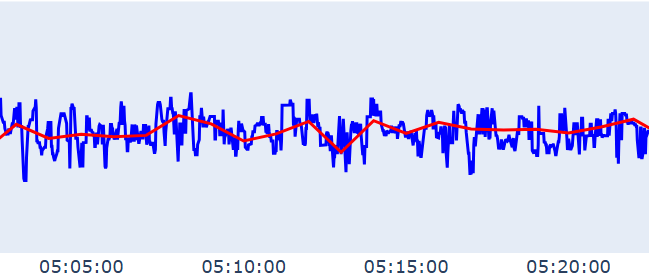

После предварительной обработки исходных данных могут быть определены моменты деформаций. Для этого необходимо вычислить вектор скорости каждой станции на каждую эпоху (в коде обозначен как d). Далее используется тест Хи-квадрат для определения, насколько ожидаемые значения (test_value) этого вектора совпадают с наблюдаемыми (test_statistic). Код функции представлен далее:

In [21]:
def geometric_test_statictics(time_series_df, window, sigma_0):
    """
    Функция разделяет временной ряд на окна, затем выполняет линейную регрессию
    и рассчет статистики геометрического теста.

    Аргументы:
        time_series_df (DataFrame): Временной ряд координат
        window (int): Размер окна (в данном случае кол-во эпох)
        sigma_0 (float): Значение СКП

    Возвращает:
        tuple: Кортеж с координатами, вычисленными с помощью линейной регрессии,
               а также результаты геометрического теста
    """
    # списки для хранения данных
    epochs = int(time_series_df[0].shape[0] / window)
    num_dfs = len(time_series_df)
    X_WLS = numpy.ndarray(shape=(epochs,1,3*num_dfs))
    Qv_WLS = numpy.ndarray(shape=(epochs,3*num_dfs,3*num_dfs))
    mu_WLS = numpy.zeros(epochs)

    # Цикл для разделения временного ряда на окна
    end = 0
    for j in range (epochs) :
        st = end
        end = int((j + 1) * window)

        mu_sum = 0
        x_LS_list = []
        Qv_list = []

        for df in time_series_df:
            x_LS, Qv, mu, Qx, V = linear_regression(df.iloc[st:end], 0.005)
            x_LS_list.append(x_LS)
            Qv_list.append(Qv)
            mu_sum += mu ** 2

        mu_WLS[j] = mu_sum
        X_WLS[j] = numpy.hstack(x_LS_list)
        Qv_WLS[j] = block_diag(*Qv_list)


    # список для хранения значений статистики
    test_statistic = numpy.zeros((epochs-1))

    # список для хранения эпох с отвергнутой гипотезой
    rejected_epochs = []

    # Расчет статистики при помощи теста Хи-квадрат
    for l in range(epochs-1):
        Qdd = Qv_WLS[l] + Qv_WLS[l+1]
        d = X_WLS[l]-X_WLS[l+1]
        sigma_0 = mu_WLS[l] + mu_WLS[l+1]
        test_statistic[l] = d.dot(numpy.linalg.inv(Qdd)).dot(d.transpose())/sigma_0
        test_value = chi2.ppf(df=((d.shape[0])/3)*6, q=0.95)
        if test_statistic[l] > test_value :
            print('reject, l =',l*window)
            print('test_value =',test_value)
            print('test_statistic =',test_statistic[l])
            rejected_epochs.append(l*window)

    return X_WLS, Qv_WLS, test_statistic, rejected_epochs

Следующий код выполняет геометрический тест на сгенерированной сети пунктов с окном линейной регрессии равным 5 эпохам:

In [22]:
window = 5
dfs = [Station_1, Station_2, Station_3, Station_4]
X_WLS, Qv_WLS, test_statistic, rejected_epochs = geometric_test_statictics(time_series_df=dfs, window=window, sigma_0=0.05)

reject, l = 45
test_value = 5.991464547107979
test_statistic = 14.28598562748348
reject, l = 95
test_value = 5.991464547107979
test_statistic = 6.750895943840253
reject, l = 145
test_value = 5.991464547107979
test_statistic = 9.772184597812302
reject, l = 195
test_value = 5.991464547107979
test_statistic = 20.462847194262896
reject, l = 295
test_value = 5.991464547107979
test_statistic = 9.788091473311427


<ipython-input-21-9120861d2782>:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  test_statistic[l] = d.dot(numpy.linalg.inv(Qdd)).dot(d.transpose())/sigma_0


Для проверки работы программы график временного ряда сопоставляется с полученными результатами при помощи библиотеки **matplotlib**:

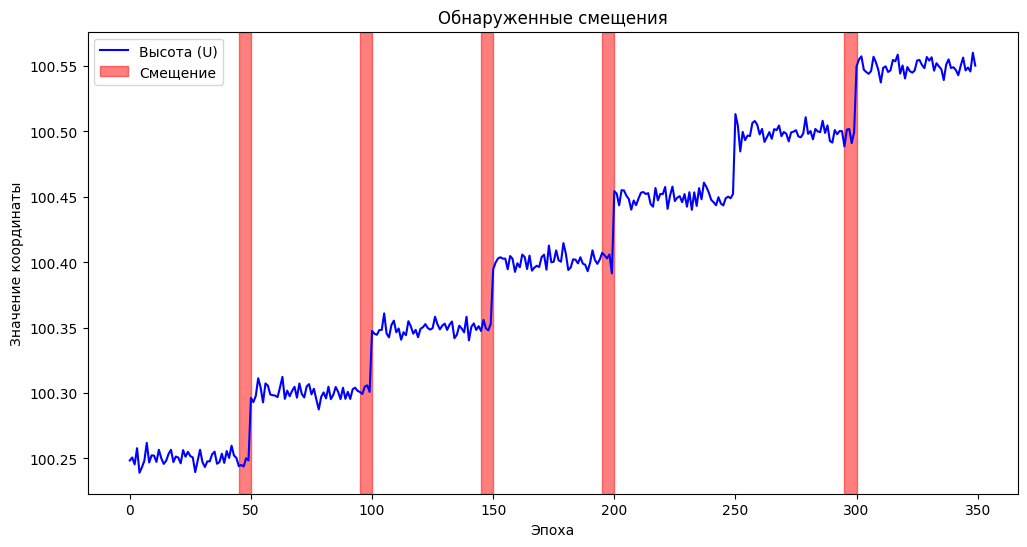

In [23]:
import matplotlib.pyplot as plt

# создание графика
plt.figure(figsize=(12, 6))

# колонка со значениями высоты
plt.plot(Station_1[2], label='Высота (U)', color='blue')

# выделение эпох, которые содержат деформации
for epoch in rejected_epochs:
    plt.axvspan(epoch, epoch + window, color='red', alpha=0.5, label=f'Смещение' if epoch == rejected_epochs[0] else "")

plt.title('Обнаруженные смещения')
plt.xlabel('Эпоха')
plt.ylabel('Значение координаты')
plt.legend()

# Показать график
plt.show()

Приведенный график показывает, что программа верно определила все эпохи, в которых смоделированы деформации сети. Однако неизвестно, какая из четырех станций испытывает деформации. Для этого можно написать функцию find_offset_points(), которая последовательно исключает из сети каждую станцию и заново выполняет геометрический тест до тех пор, пока деформация не исчезнет. Таким образом деформированная станция (или несколько станций) будет найдена:

In [24]:
def find_offset_points(dfs):
    """
    Функция выполняет перебор станций и выполняет геометрический тест,
    последовательно исключая каждую из них

    Аргументы:
        dfs (list): Словарь с названиями станций, ассоциированными с их измерениями

    Возвращает:
        list: Список станций, которые определены как содержащие деформации
    """
    # список для станций с деформацией
    excluded_stations = []

    for station_name, df in dfs_dict.items():
        # новый список, из которого исключена одна из станций
        non_station_dfs = [d for name, d in dfs_dict.items() if name != station_name]

        # геометрический тест
        X_WLS, Qv_WLS, test_statistic, rejected_epochs = geometric_test_statictics(
            time_series_df=non_station_dfs, window=window, sigma_0=0.05)

        # Если деформаций не выявлено, станция добавляется в список деформаций
        if not rejected_epochs:
            excluded_stations.append(station_name)
            break

    return excluded_stations

Применение функции:

In [25]:
dfs_dict = {'Station 1': Station_1,
            'Station 2': Station_2,
            'Station 3': Station_3,
            'Station 4': Station_4}

offset_points = find_offset_points(dfs_dict)

<ipython-input-21-9120861d2782>:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  test_statistic[l] = d.dot(numpy.linalg.inv(Qdd)).dot(d.transpose())/sigma_0


In [26]:
offset_points

['Station 1']

Программа верно определила название станции, которая была смоделирована как испытывающая вертикальные деформации.